#디지털 영상처리 알고리즘 구현 과제

알고리즘 목적 : 이미지를 전처리하고, 특정 영역을 강조하여 에지를 검출하고, 최종적으로 윤곽선을 그린 이미지를 생성하여 저장하는 과정을 통해 새를 분리하고 강조하는 것이 목적

##과제를 하기 위한 영상처리

1. 영상 크기 조정
2. 노이즈 추가
3. 영상 회전

In [ ]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(403, 302)


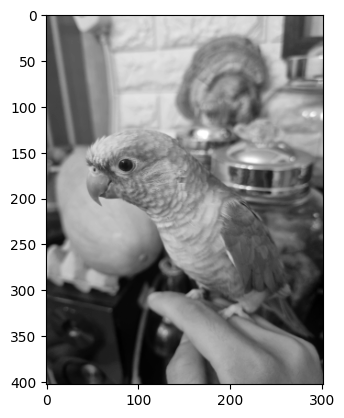

In [ ]:
Img = cv2.imread('/content/gdrive/My Drive/opencv colab/img/bird_apple.jpg')
RGB_Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB) # BGR 이미지를 RGB 이미지로 변환

scale_percent = 10  # 축소 비율
width = int(RGB_Img.shape[1] * scale_percent / 100)
height = int(RGB_Img.shape[0] * scale_percent / 100)
dim = (width, height)

# 이미지 크기 조정
resized_Img = cv2.resize(RGB_Img, dim, interpolation=cv2.INTER_AREA)

# 그레이스케일 변환
gImg = cv2.cvtColor(resized_Img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
plt.imshow(gImg,cmap='gray')

In [ ]:
from random import randint

In [ ]:
# 10% noise
noiseRatio = 10
whiteMax = noiseRatio/2
blackMax = noiseRatio

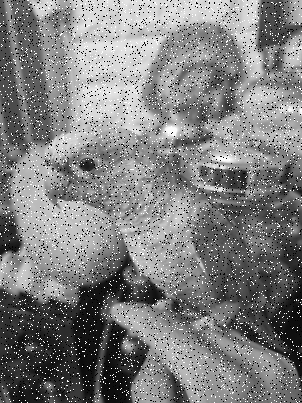

In [ ]:
noiseImg = gImg.copy()

for h in range(0, gImg.shape[0]):
  for w in range(0, gImg.shape[1]):
    val = randint(0, 100)
    if (val < whiteMax):
      noiseImg[h, w] = 255
    elif (val < blackMax):
      noiseImg[h, w] = 0

cv2_imshow(noiseImg)

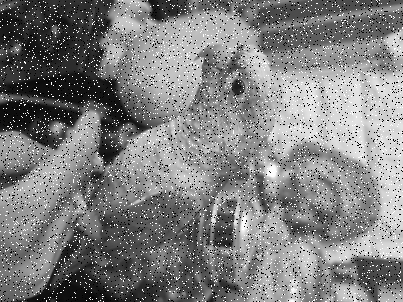

In [ ]:
rotatedImg = cv2.rotate(noiseImg, cv2.ROTATE_90_CLOCKWISE)

cv2_imshow(rotatedImg)

In [ ]:
output_path = '/content/gdrive/My Drive/opencv colab/img/bird_apple_assignments.jpg'
cv2.imwrite(output_path, rotatedImg)

print(f"이미지가 저장되었습니다: {output_path}")

이미지가 저장되었습니다: /content/gdrive/My Drive/opencv colab/img/bird_apple_assignments.jpg


## 알고리즘 구현

1. 영상의 화질 향상 기법

  1) 4장 4.3 전역 임계값 적용하기
    - 중간값 필터링: cv2.medianBlur(gImg, k)를 사용하여 이미지의 노이즈를 제거합니다.
  2) 4장 4.5 히스토그램 스트레칭
    - 가우시안 필터링: cv2.GaussianBlur(blurredImg, (5, 5), 1.5)로 이미지를 스무딩하여 노이즈를 줄이고 부드럽게 만듭니다.
  3) 4장 4.6 히스토그램 평활화
    - 언샤프 필터링: cv2.addWeighted를 사용하여 이미지의 선명도를 높입니다.

2. 영상의 특징 검출 기법

  1) 6장 6.5 캐니 에지 검출기
    - 캐니 에지 검출: cv2.Canny(maskedImg, threshold1, threshold2)를 사용하여 이미지의 에지를 검출합니다.
  2) 6장 6.1 에지 검출을 위한 연산 방법
    - 윤곽선 검출: cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)로 에지에 기반하여 윤곽선을 찾습니다.

3. 영상의 기하학적 변환

  1) 7장 7.3 회전 변환
    - 회전 변환: cv2.rotate(outImg_2, cv2.ROTATE_90_COUNTERCLOCKWISE)를 사용하여 이미지를 90도 반시계 방향으로 회전합니다.

4. 픽셀 비트 연산

  1) 3장 3.6 픽셀 비트 연산
    - 비트 연산: cv2.bitwise_and(sharpImg, sharpImg, mask=mask)를 통해 마스크를 적용하여 새 영역만 선택합니다.

In [ ]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(302, 403)


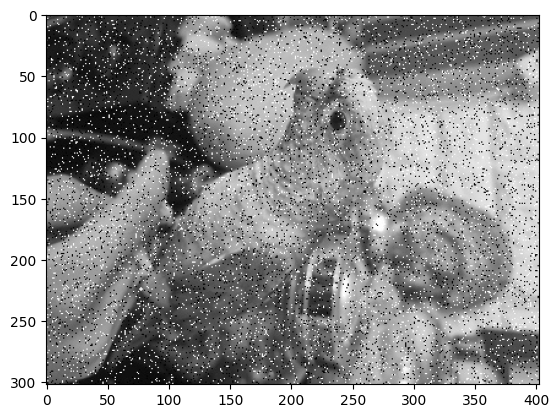

In [ ]:
Img = cv2.imread('/content/gdrive/My Drive/opencv colab/img/bird_apple_assignments.jpg')
RGB_Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB) # BGR 이미지를 RGB 이미지로 변환

# 그레이스케일 변환
gImg = cv2.cvtColor(RGB_Img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
plt.imshow(gImg,cmap='gray')

3개의 중간 값 필터링 중 가장 결과가 나은 것을 선택

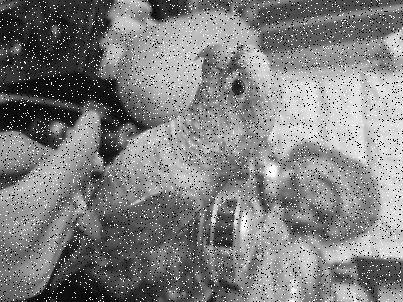

In [ ]:
outImg_1 = cv2.medianBlur(gImg, 1)
cv2_imshow(outImg_1)

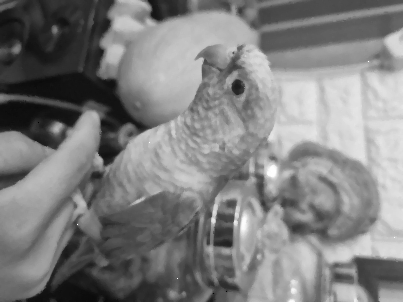

In [ ]:
outImg_2 = cv2.medianBlur(gImg, 3)
cv2_imshow(outImg_2)

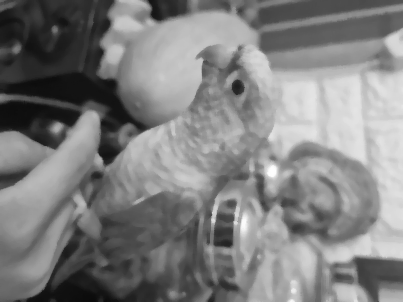

In [ ]:
outImg_3 = cv2.medianBlur(gImg, 5)
cv2_imshow(outImg_3)

커널 크기 3이 가장 결과가 좋으니 outImg_2를 사용하여 rotate

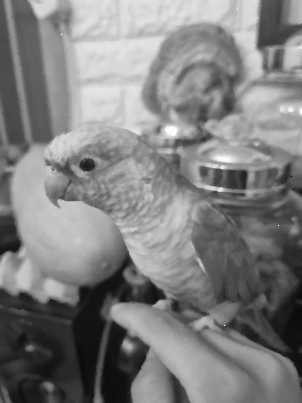

In [ ]:
rotatedImg = cv2.rotate(outImg_2, cv2.ROTATE_90_COUNTERCLOCKWISE)
cv2_imshow(rotatedImg)

가우시안 블러를 사용하여 영상을 스무딩하여 노이즈를 줄이고 부드럽게 만들고
언샤프 필터링을 통하 이미지의 선명도를 높임

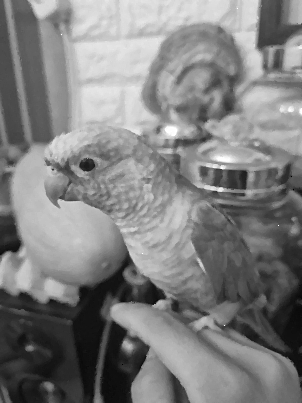

In [ ]:
blurredImg = rotatedImg.copy()

gaussianBlur = cv2.GaussianBlur(blurredImg, (5, 5), 1.5)
sharpImg = cv2.addWeighted(blurredImg, 1.5, gaussianBlur, -0.5, 0)

cv2_imshow(sharpImg)

새가 있는 영역을 마스크로 지정하고 캐니 에지를 검출




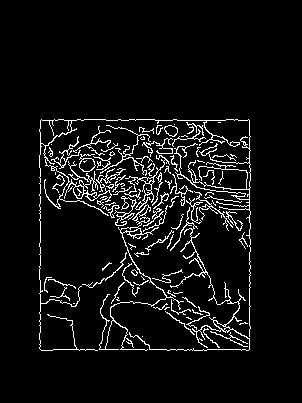

In [ ]:
mask = np.zeros_like(sharpImg)
mask[120:350, 40:250] = 255  # 새 위치에 맞게 조정

# 마스크를 적용하여 새 영역만 선택
maskedImg = cv2.bitwise_and(sharpImg, sharpImg, mask=mask)

# 캐니 에지 검출
edges = cv2.Canny(maskedImg, threshold1=50, threshold2=150)

cv2_imshow(edges)

검출된 캐니 에지에 윤곽선을 검출하고 파란색으로 윤곽선을 그림

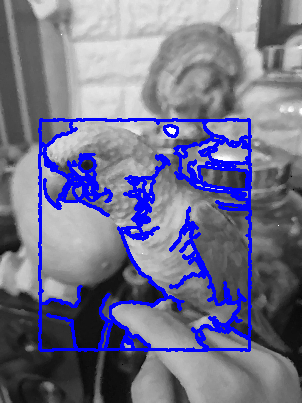

In [ ]:
# 윤곽선 검출
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 윤곽선 그리기 (면적 필터링)
outputImg = cv2.cvtColor(sharpImg, cv2.COLOR_GRAY2BGR)  # 컬러 이미지로 변환

# 에지의 면적을 기준으로 필터링
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 100:  # 면적 기준 (조정 가능)
        cv2.drawContours(outputImg, [contour], -1, (255, 0, 0), 2)  # 파란색으로 윤곽선 그리기

cv2_imshow(outputImg)

In [ ]:
output_path = '/content/gdrive/My Drive/opencv colab/img/bird_apple_edge.jpg'
cv2.imwrite(output_path, rotatedImg)

print(f"이미지가 저장되었습니다: {output_path}")

이미지가 저장되었습니다: /content/gdrive/My Drive/opencv colab/img/bird_apple_edge.jpg


목적대로 새를 강조하는 것에 성공함